Скачиваем библиотеки

In [1]:
!pip install lxml
!pip install lightgbm
!pip install phik
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install phik
!pip install random
!pip install -U scikit-learn

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [2]:
!pip install tensorflow

импортием библиотеки

In [3]:
import requests
import lxml
from bs4 import BeautifulSoup
import pandas as pd
import numpy as mp
import json
from tqdm.notebook import tqdm
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder, StandardScaler

from phik.report import plot_correlation_matrix
# from sklearn.pipeline import Pipeline

from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from random import randint
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

задаем датафрейм

In [4]:
data = pd.read_csv("total_data_clusters.csv")

# Визуализация зависимостей данных

задаем в переменную total data

In [5]:
total = data

Смотрим

In [6]:
total


,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1582981,Дорожно-транспортные происшествия,2,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 66 км",21,16,2017-09-26 19:15:00,С погибшими,...,2,50.602901,38.660358,578,3,1,3.591911e-05,0.005190,0,red
67459,1581580,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Административные з...",Алексеевский район,"г Алексеевка, ул Тимирязева, 10",7,16,2016-10-04 15:55:00,Легкий,...,2,50.614987,38.692945,578,4,3,1.197304e-05,0.006920,0,red
67460,1581982,Дорожно-транспортные происшествия,4,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 81 км",7,16,2019-01-19 20:00:00,С погибшими,...,2,50.706406,38.655910,578,2,1,2.394607e-05,0.003460,0,red
67461,1585276,"Дорожно-транспортные происшествия, ДТП и постр...",4,Нерегулируемый перекрёсток неравнозначных улиц...,Алексеевский район,"а/д Белгород-Новый Оскол-Советское, 167 км",7,16,2017-10-29 14:30:00,Легкий,...,8,50.603560,38.660960,578,15,3,4.489889e-05,0.025952,2,lightgreen


Копируем в Total_data переменную total для надежности

In [7]:
Total_data = total.copy()

Перекорием некоторые значение для визуализации данных

In [8]:
cat_col = ['tags','address']
encoder = LabelEncoder()

Total_data[cat_col] = Total_data[cat_col].apply(encoder.fit_transform)
Total_data.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,1,4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,20001,7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,1,4,"Административные здания, Остановка общественно...",Барнаул,19630,21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,0,4,"Выезд с прилегающей территории, Административн...",Барнаул,19542,21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,0,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,19473,21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,0,4,"Эстакада, путепровод",Барнаул,16771,21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen


In [8]:
features_target = Total_data[['tags','danger_level','address']]

Делаем визуализацию данных

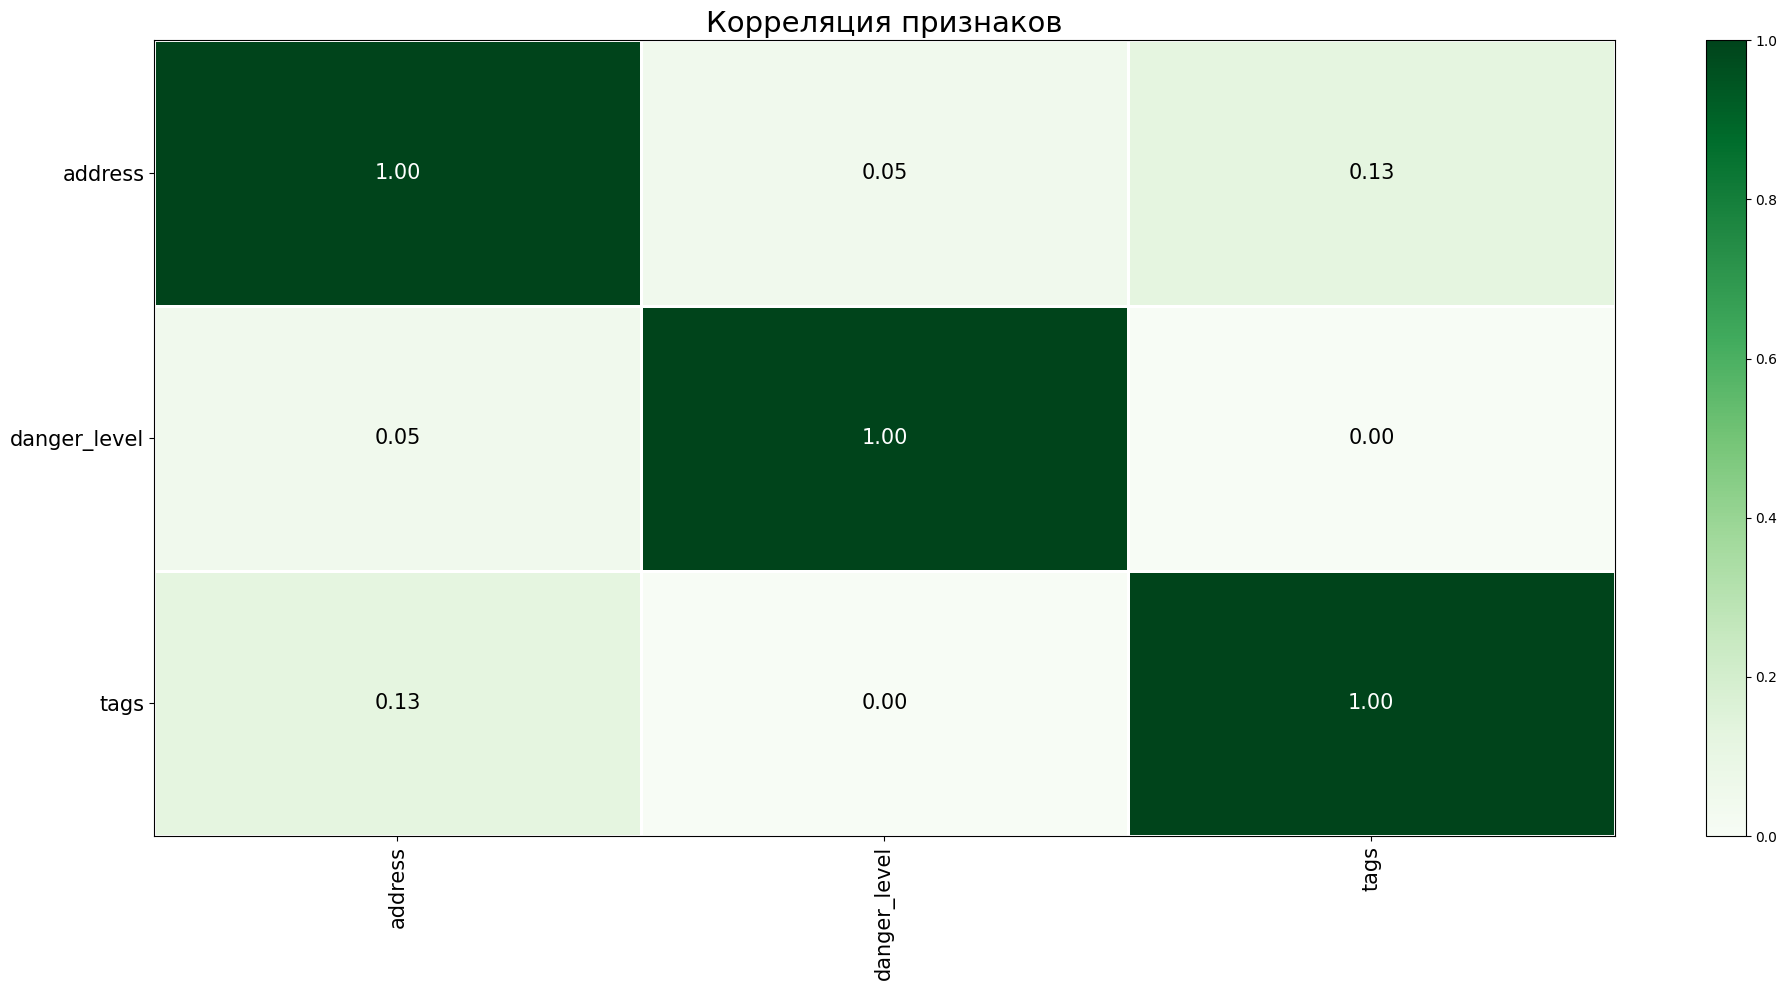

In [9]:
interval_cols = ['tags','danger_level','address']
phik_overview = features_target.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title="Корреляция признаков",
                        fontsize_factor=1.5,
                        figsize=(20, 10))
plt.tight_layout()

Другой вид

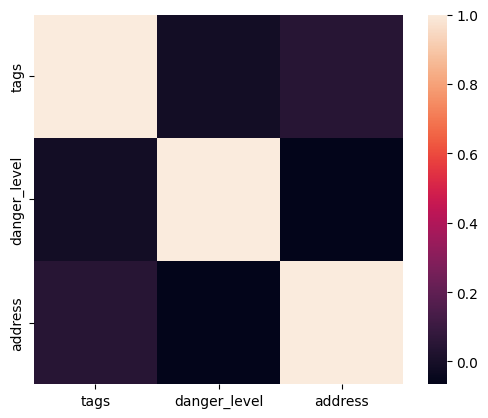

In [20]:
sns.heatmap(features_target.corr(), square=True)
plt.show()

Визуализация данных со всеми данными

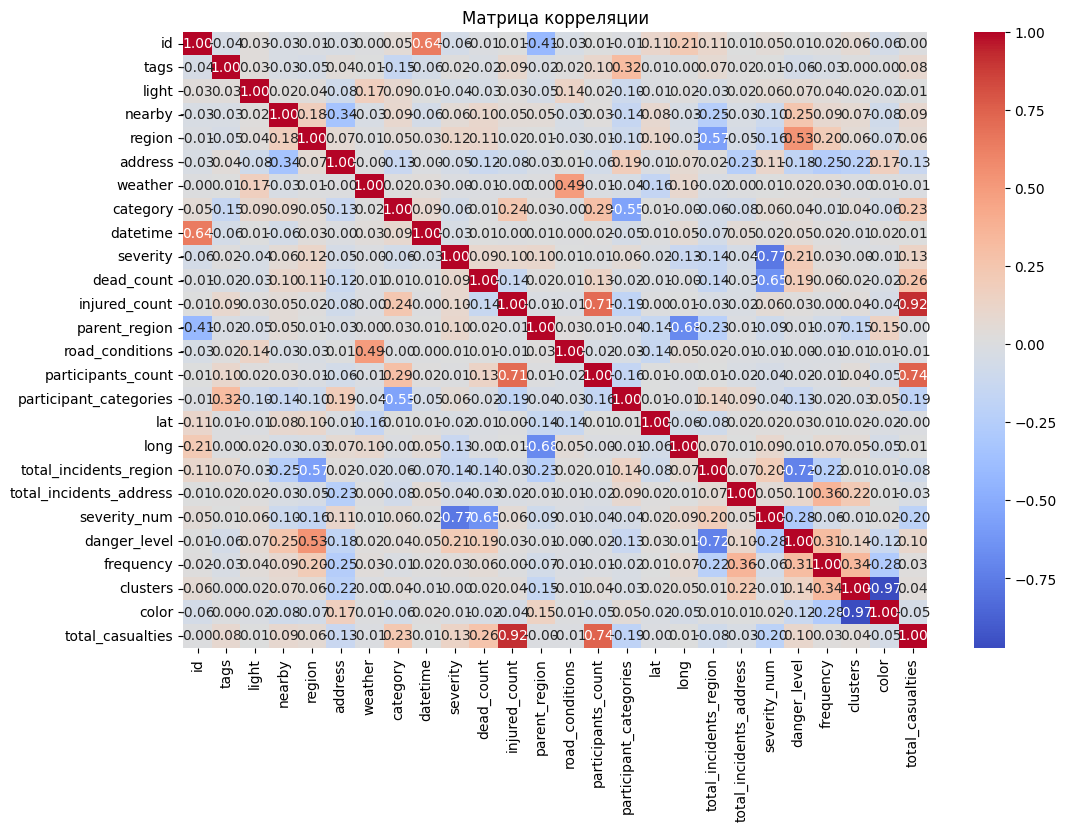

In [22]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()


# Классификация дорожных объектов

Перекодируем данные в int значение

In [12]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(data) # Теперь encoded data содержит закодированные кат. признаки
encoded_data.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,1,4,4776,9,20001,7,1,6077,0,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,2
1,2321011,1,4,621,9,19630,21,15,21976,0,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,2
2,2576909,0,4,1072,9,19542,21,16,49310,2,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,2
3,2575209,0,4,5399,9,19473,21,16,49227,0,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,2
4,2547743,0,4,9327,9,16771,21,16,47923,2,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,0


Заполняем пропуска данных и смотрим среднее значение

In [42]:
e_data = encoded_data.fillna(0)
e_data.describe()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,6.746300e+04,67463.000000,67463.000000,67463.000000
mean,2.291583e+06,0.139766,3.017402,5567.903384,47.079332,18130.019789,15.753776,12.593674,32100.999733,0.698383,...,6.779346,52.771117,69.972053,3117.114730,5.222226,2.522627,6.712658e-05,0.006116,0.590190,1.637905
std,3.446887e+05,0.420720,1.613960,2852.869267,46.362850,11287.167205,7.051935,3.879526,18591.709990,0.907516,...,5.758026,6.674725,31.540350,3593.554991,15.636449,0.648385,6.979108e-04,0.017138,1.148313,0.763898
min,1.579045e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,1.000000,1.000000,9.290173e-09,0.000096,0.000000,0.000000
25%,2.115946e+06,0.000000,2.000000,2638.500000,9.000000,8365.500000,7.000000,9.000000,15988.500000,0.000000,...,2.000000,50.402141,40.585616,359.000000,1.000000,2.000000,1.586987e-07,0.000528,0.000000,2.000000
50%,2.311501e+06,0.000000,4.000000,6397.000000,17.000000,17703.000000,21.000000,14.000000,32037.000000,0.000000,...,2.000000,52.089949,79.032000,1173.000000,2.000000,3.000000,2.176632e-06,0.002012,0.000000,2.000000
75%,2.554746e+06,0.000000,4.000000,8409.000000,91.000000,27142.500000,21.000000,16.000000,48179.500000,2.000000,...,14.000000,53.371900,83.935494,3786.000000,4.000000,3.000000,2.569340e-05,0.005682,0.000000,2.000000
max,2.907771e+06,4.000000,5.000000,9327.000000,148.000000,40335.000000,26.000000,17.000000,64427.000000,2.000000,...,29.000000,90.000000,176.432500,10375.000000,158.000000,3.000000,6.250000e-02,0.625000,3.000000,3.000000


1.Обоснование выбора модели:

Support Vector Machine (SVM): SVM хорошо работает для задач классификации, особенно в случае, когда данные не очень объемные, и есть ярко выраженные разделители между классами. SVM также позволяет легко справляться с нелинейными зависимостями с помощью ядерных функций.

Pipeline с StandardScaler: StandardScaler используется для стандартизации данных, что особенно важно для методов, таких как SVM, которые чувствительны к масштабу признаков.

Простота и эффективность: SVM - относительно простой и эффективный метод классификации, особенно когда у вас есть небольшой объем данных.

1.

Здаем в пеменную df данные из датафрейма e_data для удобстава кода

In [38]:
df = e_data

Задаем функцию

In [39]:
def convert_to_binary(value):
    if value > 2.176632e-06	:  # Предполагаем, что значения больше 0 являются опасными
        return 1
    else:
        return 0

Применим функцию для бинарной классификации

In [40]:
df['danger_level'] = df['danger_level'].apply(convert_to_binary)

Задаем в перменные x и у свои данные

In [41]:
X = df.drop('danger_level', axis=1)
y = df['danger_level']

Разделим данные на тренировочный и тестовый наборы

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2.Обоснование выбора модели:

Random Forest (Случайный лес): Эта модель хорошо обрабатывает разнообразные типы данных, автоматически обрабатывает пропущенные значения, устойчива к переобучению и не требует масштабирования признаков. Также, она способна работать с большим количеством признаков, что может быть важным при анализе данных о дорожных ситуациях.

2.

Задаем в переменную выбор признаков для классификации

In [43]:
features = df[['light', 'weather', 'road_conditions', 'participants_count', 'severity_num']]

Разделяем данные на обучающую и тестовую выборки

In [44]:
X_train, X_test, y_train, y_test = train_test_split(features.drop('severity_num', axis=1), features['severity_num'], test_size=0.2, random_state=42)

Инициализация и обучение модели

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Обучение

1.

Создадим pipeline с StandardScaler и SVM

In [30]:
model = make_pipeline(StandardScaler(), SVC())

Обучим модель на тренировочных данных

In [31]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Предскажем метки классов для тестового набора

In [32]:
y_pred = model.predict(X_test)

Оценим точность модели

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.9805084117690654


Выведем отчет по классификации

In [34]:
classification_rep = classification_report(y_test, y_pred)
print('Отчет по классификации:\n', classification_rep)

Отчет по классификации:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6671
           1       0.98      0.99      0.98      6822

    accuracy                           0.98     13493
   macro avg       0.98      0.98      0.98     13493
weighted avg       0.98      0.98      0.98     13493



2.

Предскажем метки классов для тестового набора

In [36]:
y_pred = model.predict(X_test)

Оценим точность модели

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

Точность модели: 0.5893426221003484


# Feature Engineering

# Визуализация данных по географическим признакам

In [41]:
data

,id,tags,light,nearby,region,address,weather,category,datetime,severity,...,participant_categories,lat,long,total_incidents_region,total_incidents_address,severity_num,danger_level,frequency,clusters,color
0,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",7,1,2015-09-16 13:00:00,Легкий,...,8,53.345833,83.666389,10375,1,3,9.290173e-09,0.000096,0,red
1,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",4,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",21,15,2017-08-25 15:30:00,Легкий,...,8,53.197060,83.396880,10375,3,3,2.787052e-08,0.000289,0,red
2,2576909,Дорожно-транспортные происшествия,4,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",21,16,2021-05-29 19:40:00,Тяжёлый,...,9,53.376400,83.714200,10375,2,2,3.716069e-08,0.000193,0,red
3,2575209,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",21,16,2021-05-25 16:40:00,Легкий,...,2,53.343071,83.794366,10375,1,3,9.290173e-09,0.000096,0,red
4,2547743,Дорожно-транспортные происшествия,4,"Эстакада, путепровод",Барнаул,"г Барнаул, Объездная дорога в обход г. Барнаул...",21,16,2021-02-22 13:50:00,Тяжёлый,...,2,53.290476,83.708739,10375,12,2,2.229641e-07,0.001157,3,darkgreen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,1582981,Дорожно-транспортные происшествия,2,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 66 км",21,16,2017-09-26 19:15:00,С погибшими,...,2,50.602901,38.660358,578,3,1,3.591911e-05,0.005190,0,red
67459,1581580,Дорожно-транспортные происшествия,4,"Многоквартирные жилые дома, Административные з...",Алексеевский район,"г Алексеевка, ул Тимирязева, 10",7,16,2016-10-04 15:55:00,Легкий,...,2,50.614987,38.692945,578,4,3,1.197304e-05,0.006920,0,red
67460,1581982,Дорожно-транспортные происшествия,4,Нету информации,Алексеевский район,"а/д Валуйки-Алексеевка-Красное, 81 км",7,16,2019-01-19 20:00:00,С погибшими,...,2,50.706406,38.655910,578,2,1,2.394607e-05,0.003460,0,red
67461,1585276,"Дорожно-транспортные происшествия, ДТП и постр...",4,Нерегулируемый перекрёсток неравнозначных улиц...,Алексеевский район,"а/д Белгород-Новый Оскол-Советское, 167 км",7,16,2017-10-29 14:30:00,Легкий,...,8,50.603560,38.660960,578,15,3,4.489889e-05,0.025952,2,lightgreen


In [50]:
total = data.fillna(0)

In [ ]:
dangerous_objects = df[df['danger_level'] == 'high']
map = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

for index, row in df.iterrows():
    color = 'red' if row['danger_level'] == 'high' else 'blue'
    folium.Marker([row['lat'], row['long']], popup=row['address'], icon=folium.Icon(color=color)).add_to(map)

map.save('map.html')  # Сохранение карты в HTML-файл

# Отчет

В результате этой сессии я сделал визуализацию зависимотсти некоторых так и всех данных 
Была выбранна лучшая класификация данных с пояснение выбора данной клсификации 
была выполнена обучнение данных
#И была сделана подробная визаулизация данных на карте мира

# в одном коде

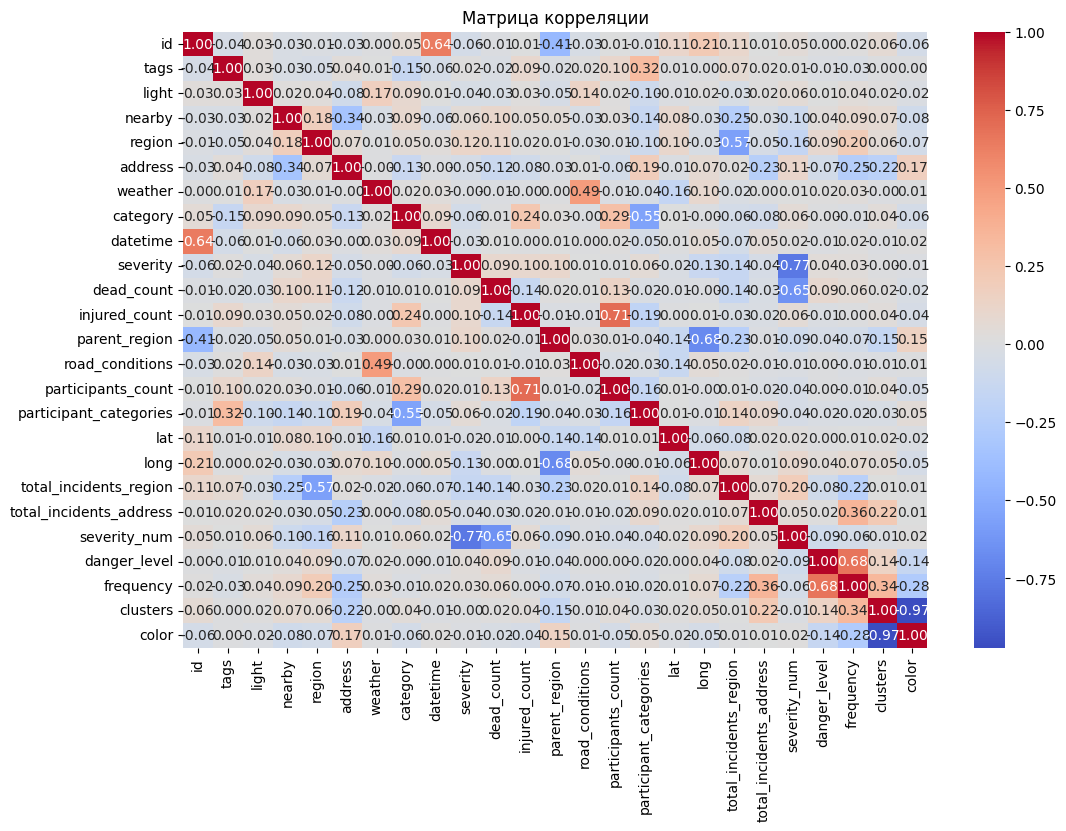

Точность модели: 0.5893426221003484


In [19]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import folium

# Загрузка данных
df = e_data

# 3.2 Классификация дорожных объектов
# Выбор признаков для классификации
features = df[['light', 'weather', 'road_conditions', 'participants_count', 'severity_num']]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features.drop('severity_num', axis=1), features['severity_num'], test_size=0.2, random_state=42)

# Инициализация и обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3.3 Обучение
# Тестирование модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

# 3.4 Feature Engineering (дополнительные шаги могут быть добавлены в зависимости от данных)
# Пример: создание нового признака на основе суммы травмированных и погибших
df['total_casualties'] = df['dead_count'] + df['injured_count']


# 3.6 Подготовка отчета
# Создание отчета с результатами, выводами и обоснованием выбора по каждому разделу задания
# Описать содержимое результирующих файлов архива Data.zip
# ...


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Замените data.csv на ваш файл данных
data_path = 'путь_к_вашему_файлу.csv'

# Загрузим данные из DataFrame
df = e_data

# Проверим тип данных в столбце 'danger_level'
def convert_to_binary(value):
    if value > 2.176632e-06	:  # Предполагаем, что значения больше 0 являются опасными
        return 1
    else:
        return 0

# Применим функцию для бинарной классификации
df['danger_level'] = df['danger_level'].apply(convert_to_binary)

# Замените 'target_column' на имя вашего столбца с метками классов
X = df.drop('danger_level', axis=1)
y = df['danger_level']

# Разделим данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим pipeline с StandardScaler и SVM
model = make_pipeline(StandardScaler(), SVC())

# Обучим модель на тренировочных данных
model.fit(X_train, y_train)

# Предскажем метки классов для тестового набора
y_pred = model.predict(X_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

# Выведем отчет по классификации
classification_rep = classification_report(y_test, y_pred)
print('Отчет по классификации:\n', classification_rep)


Точность модели: 0.98102719928852
Отчет по классификации:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      6671
           1       0.98      0.99      0.98      6822

    accuracy                           0.98     13493
   macro avg       0.98      0.98      0.98     13493
weighted avg       0.98      0.98      0.98     13493

